# Config

In [282]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [284]:
if torch.cuda.is_available():
    print("GPU is available")
    print("Current device:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("GPU is not available, using CPU")

GPU is available
Current device: 0
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [286]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Hyper-Parameters

In [378]:
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Dataset Loader Function

In [291]:
def get_data_loader(dataset_name, batch_size=64):
    """
    Function to load MNIST or CIFAR-10 dataset based on the input parameter.
    
    Args:
        dataset_name (str): The name of the dataset to load. Should be either 'mnist' or 'cifar10'.
        batch_size (int): The batch size for the data loaders. Default is 64.
        
    Returns:
        train_loader (DataLoader): DataLoader for training data.
        test_loader (DataLoader): DataLoader for testing data.
    """
    # Define transformations based on the dataset
    if dataset_name.lower() == 'mnist':
        transform = transforms.ToTensor()
        train_dataset = torchvision.datasets.MNIST(root='./Dataset_DL',
                                                   train=True,
                                                   transform=transform,
                                                   download=True)
        test_dataset = torchvision.datasets.MNIST(root='./Dataset_DL',
                                                  train=False,
                                                  transform=transform)
        
    elif dataset_name.lower() == 'cifar10':
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalization specific to CIFAR-10
        ])
        train_dataset = torchvision.datasets.CIFAR10(root='./Dataset_DL',
                                                     train=True,
                                                     transform=transform,
                                                     download=True)
        test_dataset = torchvision.datasets.CIFAR10(root='./Dataset_DL',
                                                    train=False,
                                                    transform=transform)
    else:
        raise ValueError("Dataset not recognized. Please choose 'mnist' or 'cifar10'.")
    
    # Data loader
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True)
    
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False)
    
    # Print the size of the datasets
    print("Size of the training dataset:", len(train_dataset))  # Number of training samples
    print("Size of the test dataset:", len(test_dataset))      # Number of test samples
    
    return train_loader, test_loader

# Model

In [406]:
# Convolutional neural network (two convolutional layers)
class ConvNet_1c(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet_1c, self).__init__()
        
        # First convolutional block
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),  # 1 channel for grayscale
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 14x14
        
        # Second convolutional block
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 7x7
        
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*32, 512)  # Adjusted for 7x7 feature map with 32 channels
        self.fc2 = nn.Linear(512, num_classes)  # Final output for 10 classes
        
    def forward(self, x):
        out = self.layer1(x)  # First block
        out = self.layer2(out)  # Second block
        out = out.reshape(out.size(0), -1)  # Flatten the feature map (batch_size, 7*7*32)
        out = self.fc1(out)  # First fully connected layer
        out = self.fc2(out)  # Final output layer
        return out

In [408]:
# Convolutional neural network (two convolutional layers)
class ConvNet_3c(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet_3c, self).__init__()
        
        # First convolutional block
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),  # 3 channels for RGB
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 16x16
        
        # Second convolutional block
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 8x8
        
        # Third convolutional block
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 4x4
        
        # Fourth convolutional block
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Output: 2x2
        
        # Fully connected layers
        self.fc1 = nn.Linear(2*2*128, 512)  # Adjusted for 2x2 feature map with 128 channels
        self.fc2 = nn.Linear(512, num_classes)  # Final output for 10 classes
        
    def forward(self, x):
        out = self.layer1(x)  # First block
        out = self.layer2(out)  # Second block
        out = self.layer3(out)  # Third block
        out = self.layer4(out)  # Fourth block
        out = out.reshape(out.size(0), -1)  # Flatten the feature map
        out = self.fc1(out)  # First fully connected layer
        out = self.fc2(out)  # Final output layer
        return out

## Loss and Optimizer

In [410]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training

In [412]:
# Train the model
def train_model(train_loader, num_epochs, model, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    total_step = len(train_loader)

    # Initialize a list to store the loss values for each iteration
    loss_list = []
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 50 == 0:
                loss_list.append(loss.item())
            
            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')
    
    return model, loss_list

## Testing

In [392]:
# Test the model
def test_model(test_loader, model, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            # Total number of labels and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy of the model on the test images: {accuracy:.2f} %')


# MNSIT

In [414]:
model = ConvNet_1c(num_classes).to(device)

In [416]:
train_loader, test_loader = get_data_loader('mnist', batch_size)

Size of the training dataset: 60000
Size of the test dataset: 10000


In [418]:
model_mnsit, loss_list = train_model(train_loader, num_epochs, model, criterion, optimizer, device)

Epoch [1/5], Step [100/600], Loss: 2.3257
Epoch [1/5], Step [200/600], Loss: 2.3638
Epoch [1/5], Step [300/600], Loss: 2.3669
Epoch [1/5], Step [400/600], Loss: 2.3824
Epoch [1/5], Step [500/600], Loss: 2.3403
Epoch [1/5], Step [600/600], Loss: 2.3936
Epoch [2/5], Step [100/600], Loss: 2.3153
Epoch [2/5], Step [200/600], Loss: 2.3266
Epoch [2/5], Step [300/600], Loss: 2.3884
Epoch [2/5], Step [400/600], Loss: 2.3574
Epoch [2/5], Step [500/600], Loss: 2.3305
Epoch [2/5], Step [600/600], Loss: 2.3001
Epoch [3/5], Step [100/600], Loss: 2.4006
Epoch [3/5], Step [200/600], Loss: 2.3384
Epoch [3/5], Step [300/600], Loss: 2.3350
Epoch [3/5], Step [400/600], Loss: 2.3212
Epoch [3/5], Step [500/600], Loss: 2.3961
Epoch [3/5], Step [600/600], Loss: 2.3789
Epoch [4/5], Step [100/600], Loss: 2.3347
Epoch [4/5], Step [200/600], Loss: 2.3636
Epoch [4/5], Step [300/600], Loss: 2.3974
Epoch [4/5], Step [400/600], Loss: 2.3454
Epoch [4/5], Step [500/600], Loss: 2.3361
Epoch [4/5], Step [600/600], Loss:

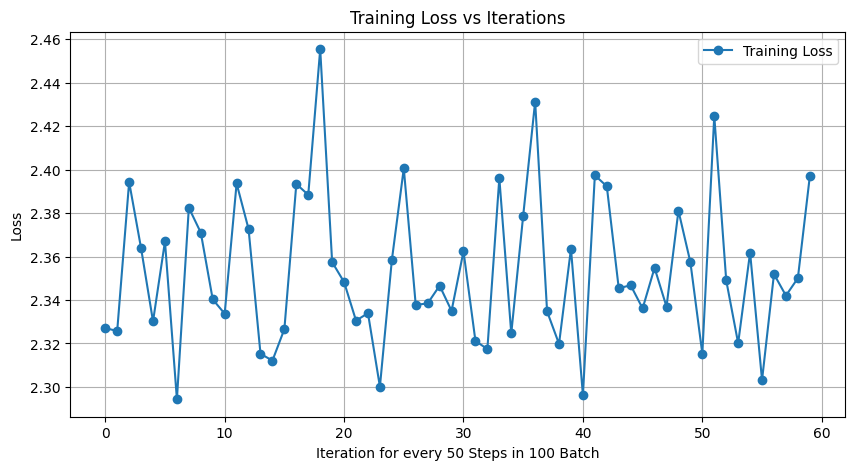

In [420]:
import matplotlib.pyplot as plt

# After training, plot the loss curve
plt.figure(figsize=(10,5))
plt.plot(loss_list, label='Training Loss', marker='o')

# Annotate each point with its value
# for i, value in enumerate(loss_list):
#     plt.text(i, 
#         value, 
#         f'{value:.2f}', 
#         fontsize=12, 
#         ha='right'
#             ) 

plt.xlabel('Iteration for every 50 Steps in 100 Batch')
plt.ylabel('Loss')
plt.title('Training Loss vs Iterations')
plt.legend()
plt.grid(True)  # Optional
plt.show()

In [422]:
test_model(test_loader, model_mnsit, device)

Test Accuracy of the model on the test images: 16.26 %


# CIFAR-10

In [424]:
model = ConvNet_3c(num_classes).to(device)

In [426]:
train_loader, test_loader = get_data_loader('cifar10', batch_size)

Files already downloaded and verified
Size of the training dataset: 50000
Size of the test dataset: 10000


In [428]:
model_cifar, loss_list_c = train_model(train_loader, num_epochs, model, criterion, optimizer, device)

Epoch [1/5], Step [100/500], Loss: 2.3706
Epoch [1/5], Step [200/500], Loss: 2.3721
Epoch [1/5], Step [300/500], Loss: 2.3557
Epoch [1/5], Step [400/500], Loss: 2.3810
Epoch [1/5], Step [500/500], Loss: 2.3257
Epoch [2/5], Step [100/500], Loss: 2.3514
Epoch [2/5], Step [200/500], Loss: 2.3516
Epoch [2/5], Step [300/500], Loss: 2.3982
Epoch [2/5], Step [400/500], Loss: 2.3389
Epoch [2/5], Step [500/500], Loss: 2.3320
Epoch [3/5], Step [100/500], Loss: 2.3705
Epoch [3/5], Step [200/500], Loss: 2.3889
Epoch [3/5], Step [300/500], Loss: 2.3706
Epoch [3/5], Step [400/500], Loss: 2.3856
Epoch [3/5], Step [500/500], Loss: 2.4901
Epoch [4/5], Step [100/500], Loss: 2.3690
Epoch [4/5], Step [200/500], Loss: 2.3356
Epoch [4/5], Step [300/500], Loss: 2.3415
Epoch [4/5], Step [400/500], Loss: 2.2998
Epoch [4/5], Step [500/500], Loss: 2.3302
Epoch [5/5], Step [100/500], Loss: 2.4038
Epoch [5/5], Step [200/500], Loss: 2.3671
Epoch [5/5], Step [300/500], Loss: 2.3830
Epoch [5/5], Step [400/500], Loss:

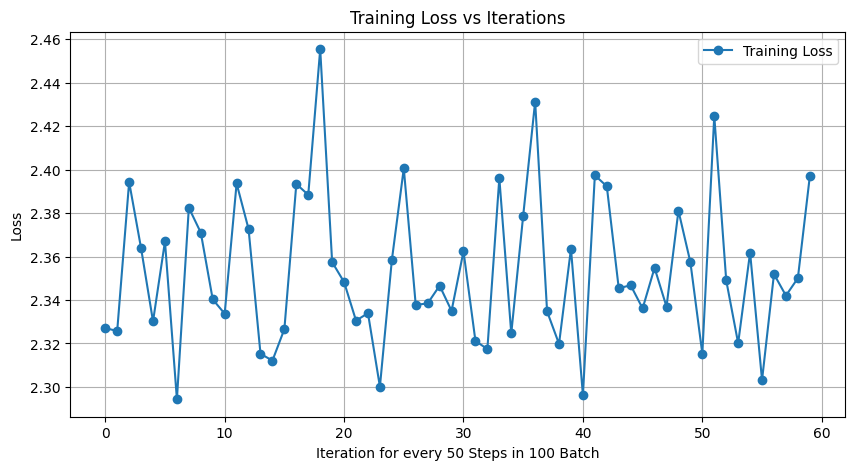

In [429]:
import matplotlib.pyplot as plt

# After training, plot the loss curve
plt.figure(figsize=(10,5))
plt.plot(loss_list, label='Training Loss', marker='o')

# Annotate each point with its value
# for i, value in enumerate(loss_list):
#     plt.text(i, 
#         value, 
#         f'{value:.2f}', 
#         fontsize=12, 
#         ha='right'
#             ) 

plt.xlabel('Iteration for every 50 Steps in 100 Batch')
plt.ylabel('Loss')
plt.title('Training Loss vs Iterations')
plt.legend()
plt.grid(True)  # Optional
plt.show()

In [430]:
test_model(test_loader, model_cifar, device)

Test Accuracy of the model on the test images: 8.83 %
